In [7]:
import numpy as np
# import pandas as pd
# import collections
import cv2
import random
# from os import path
import os

In [8]:
train_data = np.load(r"data/training_data.npy", allow_pickle=True)
print(f"Data shape: {train_data.shape}")

Data shape: (13500, 2)


In [3]:
train_data[0:, 1].sum()

855

In [12]:
train_data[0]

array([array([[255, 255, 255, ..., 255, 255, 100],
       [255, 124, 255, ..., 255, 255, 168],
       [255, 255, 255, ..., 255, 255, 160],
       ...,
       [  0,   0,   0, ...,   0,   0, 233],
       [  0,   0,   0, ...,   0,   0, 236],
       [104, 104, 197, ..., 245, 245, 252]], dtype=uint8),
       1], dtype=object)

In [22]:
positive_mask = train_data[:, 1] != 0

In [46]:
print(positive_mask.nonzero())

(array([    0,   309,  2222,  2223,  2224,  2225,  2226,  2227,  2228,
        2229,  2230,  2231,  2232,  2233,  2234,  2235,  2236,  2237,
        2238,  2239,  2240,  2241,  2242,  2243,  2244,  2245,  2246,
        2247,  2248,  2249,  2250,  2251,  2252,  2253,  2254,  2255,
        2256,  2257,  2258,  2259,  2260,  2261,  2262,  2263,  2264,
        2265,  2266,  2267,  2268,  2269,  2270,  2271,  2272,  2273,
        2274,  2275,  2276,  2277,  2278,  2279,  2280,  2281,  2282,
        2283,  2284,  2285,  2286,  2287,  2288,  2289,  2290,  2291,
        2292,  2293,  2294,  2295,  2296,  2297,  2298,  2299,  2300,
        2301,  2302,  2303,  2304,  2305,  2306,  2307,  2308,  2309,
        2310,  2311,  2312,  2313,  2314,  2315,  2316,  2317,  2318,
        2319,  2320,  2321,  2322,  2323,  2324,  2325,  2326,  2327,
        2328,  2329,  2330,  2331,  2332,  2333,  2334,  2335,  2336,
        2337,  2338,  2339,  2340,  2341,  2342,  2343,  2344,  2345,
        2346,  2347

In [6]:
train_data[0, 0].shape

(60, 80)

In [13]:
def display_image(sample):
    """
    DO NOT CLOSE THE WINDOW BOX USING THE "X"
    Hit any keyboard key to close it
    """
    img = train_data[sample][0]
    choice = train_data[sample][1]
    img = cv2.resize(img, (800, 600))
    print(choice)
    cv2.imshow('test', img)
    cv2.resizeWindow('test', (800, 600))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [14]:
display_image(12972)

0


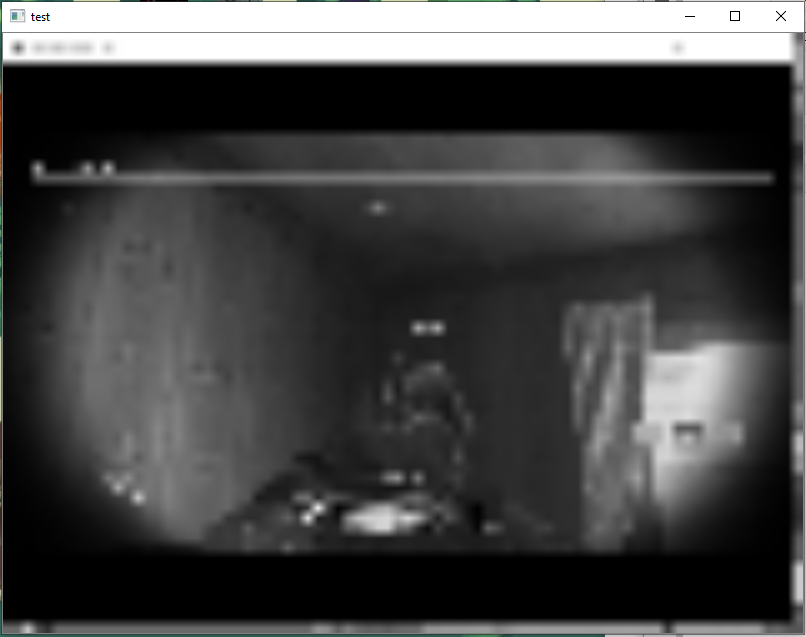

In [705]:
display_image(94140)

[0]


# Set labels
- 0 = Nothing
- 1 = Macro start
- 2 = Macro stop


In [1044]:
macro_start = np.concatenate([
    np.arange(2146, 2574),
    np.arange(4575,4914),
    np.arange(7993, 8688),
    np.arange(12425, 12973)
])

macro_stop = np.concatenate([
    np.arange(6602, 6791),
    np.arange(10553, 10739)
])

In [1038]:
len(macro_stop)

375

In [1040]:
# Reset all labels first to due to mouse clicks not part of the intended data
train_data[:, 1] = 0

In [1042]:
# Check
train_data[0:, 1].sum()

0

In [1043]:
# Set macro start labels to 1
train_data[macro_start, 1] = 1

# Check
train_data[0:, 1].sum()

2010

In [1048]:
# Set macro stop labels to 2
train_data[macro_stop, 1] = 2

# Check
(train_data[0:, 1] == 2).sum()

375

In [1049]:
file_name = r"data/training_data_labeled.npy"
np.save(file_name, train_data)
print("Labeled data saved!")

Labeled data saved!


# Shuffle training data

In [1061]:
np.random.seed(42)

In [1062]:
np.random.shuffle(train_data)

In [1063]:
train_data[:, 1]

array([0, 0, 0, ..., 1, 0, 0], dtype=object)

In [1065]:
file_name = r"data/training_data_labeled_shuffled.npy"
np.save(file_name, train_data)
print("Labeled data saved!")

Labeled data saved!


# Cloning rows to increase minority class
- The `2` class only has around 300 examples compared to over 2,000 for class `1` and 10,000 for class `0`
- Instead of recording more gameplay footage, we'll try to clone the `2` class and add in around 6 times the examples into the training data

In [1075]:
train_data[np.where(train_data[:, 1] == 2)].shape

(375, 2)

In [1088]:
train_data.shape

(13500, 2)

In [1089]:
cloned_class_two = np.repeat(train_data[np.where(train_data[:, 1] == 2)], repeats=5, axis=0)
cloned_class_two.shape

(1875, 2)

In [1093]:
upsampled_class_two = np.concatenate((train_data, cloned_class_two))
upsampled_class_two.shape

In [1094]:
np.random.seed(42)
np.random.shuffle(upsampled_class_two)

file_name = r"data/training_data_upsampled.npy"
np.save(file_name, upsampled_class_two)
print("Labeled data saved!")

Labeled data saved!


In [1095]:
upsampled_class_two.shape

(15375, 2)

# Numpy slicing tests
- Use `np.concatenate` to merge multiple `np.arange()` into a single index

In [996]:
train_data_small = train_data[:10]

In [997]:
train_data_small.shape

(10, 2)

In [1021]:
train_data_small[:, 1] = 0

In [1022]:
train_data_small[:, 1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [1000]:
train_data_small[0:2, 1] = 8

In [1001]:
train_data_small[:, 1]

array([8, 8, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [1004]:
train_data_small[[0, 2], 1] = 8

In [1005]:
train_data_small[:, 1]

array([8, 0, 8, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [1033]:
# multiple slices at once
# indexes = np.array([np.arange(0, 2, dtype=np.uint8), np.array([3], dtype=np.uint8)])
indexes = np.concatenate([np.arange(0, 2), np.arange(6, 10)])
indexes
train_data_small[indexes, 1] = 8
train_data_small[:, 1]

array([8, 8, 0, 0, 0, 0, 8, 8, 8, 8], dtype=object)

In [1030]:
indexes = np.concatenate([np.arange(0,5), np.arange(2,7)])

In [1031]:
indexes

array([0, 1, 2, 3, 4, 2, 3, 4, 5, 6])